### Keypoints
- Learn the complex computing, mostly based on array and xgcm 
- learn sum(dim='k').mean(dim='time'),grid.diff_2d_vector

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from dask_gateway import GatewayCluster
from dask.distributed import Client
cluster = GatewayCluster()
cluster.scale(5)
client = Client(cluster)
cluster

In [3]:
import intake
cat = intake.open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
print(list(cat))

['sea_surface_height', 'cesm_mom6_example', 'ECCOv4r3', 'SOSE', 'GODAS', 'ECCO_layers', 'altimetry', 'LLC4320', 'GFDL_CM2_6', 'CESM_POP', 'channel', 'MEOM_NEMO']


In [4]:
ds = cat.ECCOv4r3.to_dask()
ds

<xarray.Dataset>
Dimensions:    (time: 288, k_l: 50, face: 13, j: 90, i: 90, k: 50, i_g: 90,
                j_g: 90, time_snp: 287, k_p1: 51, k_u: 50)
Coordinates: (12/37)
    Depth      (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC     (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF     (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    XC         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    ...         ...
    rA         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAs        (face, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAw        (face, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAz        (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * time_snp   (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-01
Data variables: (12/36)
    ADVr_SLT   (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH    (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT   (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH    (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT   (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ...         ...
    basins     (face, j, i) int16 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    oceFWflx   (time, face, j, i) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceQsw     (time, face, j, i) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceSPtnd   (time, k, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    oceTAUX    (time, face, j, i_g) float32 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    oceTAUY    (time, face, j_g, i) float32 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>

In [5]:
# a trick to make things work a bit faster
coords = ds.coords.to_dataset().reset_coords()
ds = ds.reset_coords(drop=True)

In [6]:
ds

<xarray.Dataset>
Dimensions:    (time: 288, k_l: 50, face: 13, j: 90, i: 90, k: 50, i_g: 90,
                j_g: 90, time_snp: 287, k_p1: 51, k_u: 50)
Coordinates:
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * time_snp   (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-01
Data variables: (12/36)
    ADVr_SLT   (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH    (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT   (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH    (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT   (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ...         ...
    basins     (face, j, i) int16 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    oceFWflx   (time, face, j, i) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceQsw     (time, face, j, i) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceSPtnd   (time, k, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    oceTAUX    (time, face, j, i_g) float32 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    oceTAUY    (time, face, j_g, i) float32 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>

In [7]:
coords.Depth

<xarray.DataArray 'Depth' (face: 13, j: 90, i: 90)>
dask.array<open_dataset-6ce98bd29e773c3c1a1ea9aa1f536dfcDepth, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
Attributes:
    coordinate:     XC YC
    long_name:      ocean depth
    standard_name:  ocean_depth
    units:          m

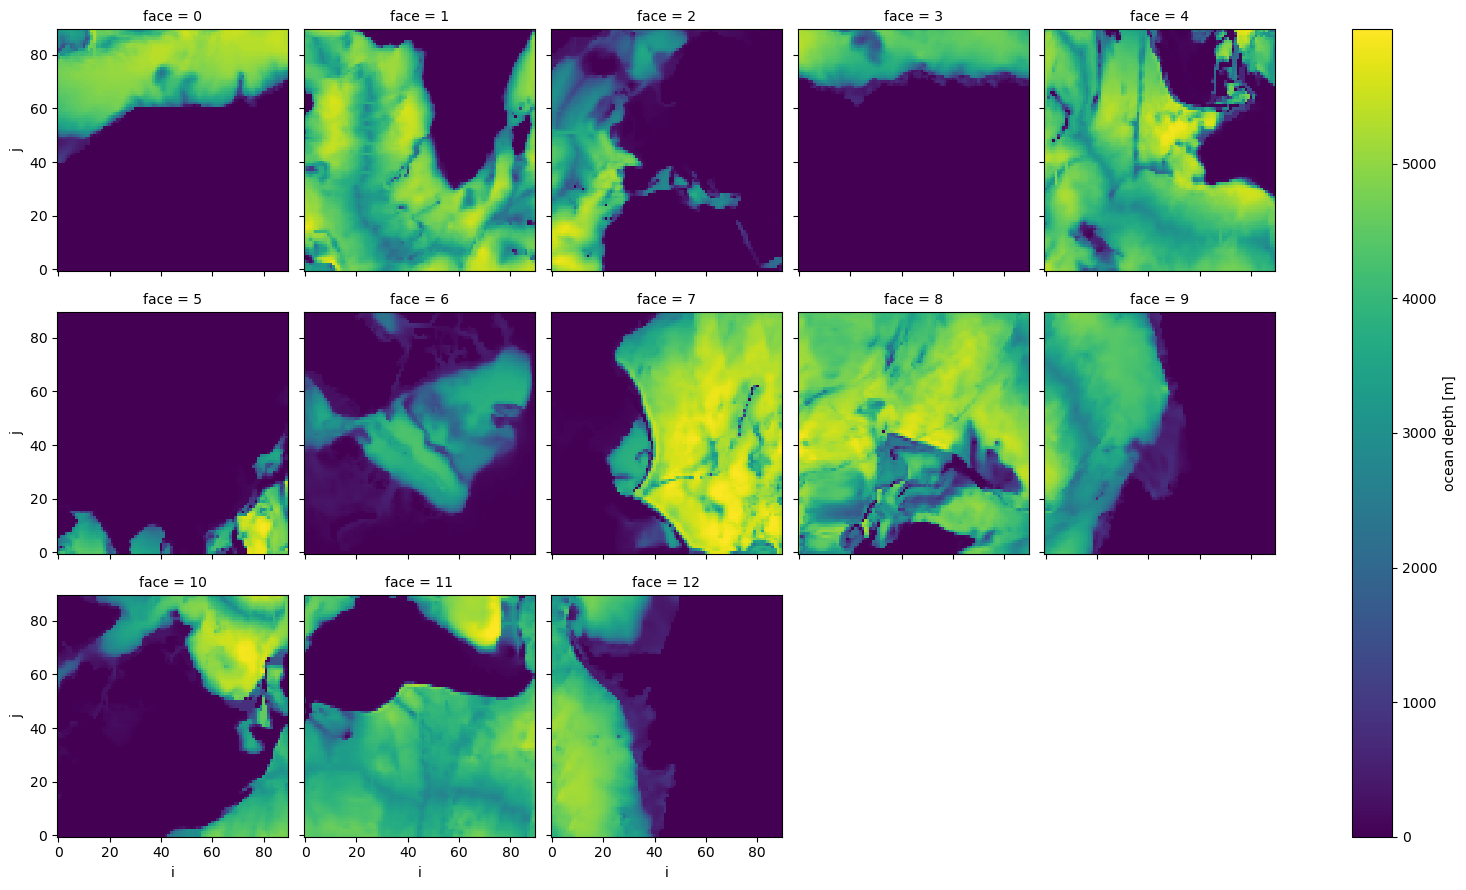

In [8]:
coords.Depth.plot(col='face', col_wrap=5)

In [9]:
from matplotlib import pyplot as plt
import cartopy as cart
import pyresample

class LLCMapper:

    def __init__(self, ds, dx=0.25, dy=0.25):
        # Extract LLC 2D coordinates
        lons_1d = ds.XC.values.ravel()
        lats_1d = ds.YC.values.ravel()

        # Define original grid
        self.orig_grid = pyresample.geometry.SwathDefinition(lons=lons_1d, lats=lats_1d)

        # Longitudes latitudes to which we will we interpolate
        lon_tmp = np.arange(-180, 180, dx) + dx/2
        lat_tmp = np.arange(-90, 90, dy) + dy/2

        # Define the lat lon points of the two parts.
        self.new_grid_lon, self.new_grid_lat = np.meshgrid(lon_tmp, lat_tmp)
        self.new_grid  = pyresample.geometry.GridDefinition(lons=self.new_grid_lon,
                                                            lats=self.new_grid_lat)

    def __call__(self, da, ax=None, projection=cart.crs.Robinson(), lon_0=-60, **plt_kwargs):

        assert set(da.dims) == set(['face', 'j', 'i']), "da must have dimensions ['face', 'j', 'i']"

        if ax is None:
            fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})
        else:
            m = plt.axes(projection=projection)

        field = pyresample.kd_tree.resample_nearest(self.orig_grid, da.values,
                                                    self.new_grid,
                                                    radius_of_influence=100000,
                                                    fill_value=None)

        vmax = plt_kwargs.pop('vmax', field.max())
        vmin = plt_kwargs.pop('vmin', field.min())


        x,y = self.new_grid_lon, self.new_grid_lat

        # Find index where data is splitted for mapping
        split_lon_idx = round(x.shape[1]/(360/(lon_0 if lon_0>0 else lon_0+360)))


        p = ax.pcolormesh(x[:,:split_lon_idx], y[:,:split_lon_idx], field[:,:split_lon_idx],
                         vmax=vmax, vmin=vmin, transform=cart.crs.PlateCarree(), zorder=1, **plt_kwargs)
        p = ax.pcolormesh(x[:,split_lon_idx:], y[:,split_lon_idx:], field[:,split_lon_idx:],
                         vmax=vmax, vmin=vmin, transform=cart.crs.PlateCarree(), zorder=2, **plt_kwargs)

        ax.add_feature(cart.feature.LAND, facecolor='0.5', zorder=3)
        label = ''
        if da.name is not None:
            label = da.name
        if 'units' in da.attrs:
            label += ' [%s]' % da.attrs['units']
        cb = plt.colorbar(p, shrink=0.4, label=label)
        return ax


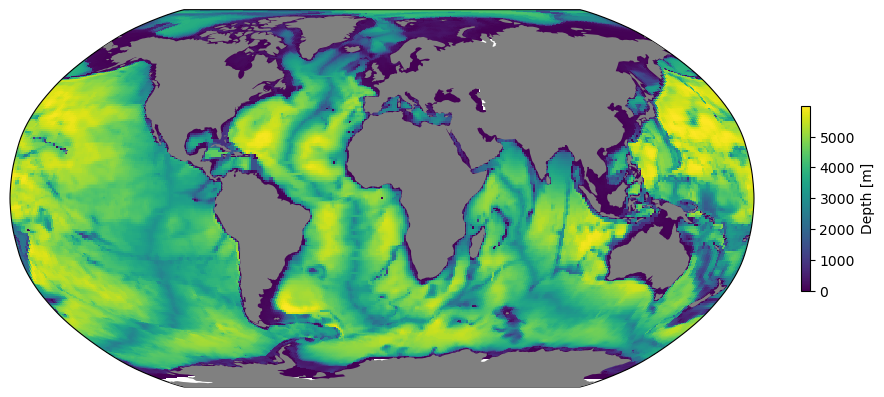

In [10]:
mapper = LLCMapper(coords)
mapper(coords.Depth);

In [11]:
sst = ds.THETA.sel(time='2000-01-15', k=0)
sst

<xarray.DataArray 'THETA' (face: 13, j: 90, i: 90)>
dask.array<getitem, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    k        int64 0
    time     datetime64[ns] 2000-01-15
Attributes:
    long_name:      Potential Temperature
    standard_name:  THETA
    units:          degC

/srv/conda/envs/notebook/lib/python3.10/site-packages/matplotlib/colors.py:719: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


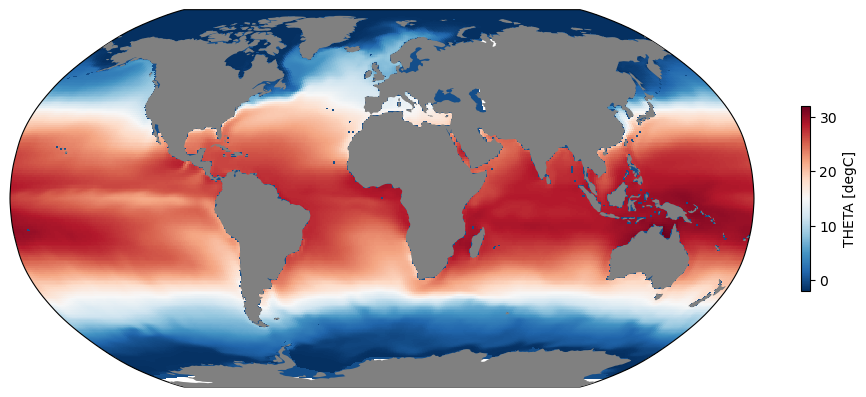

In [12]:
mapper(sst, cmap='RdBu_r');

In [25]:
ds.THETA.sel(k=0)

<xarray.DataArray 'THETA' (time: 288, face: 13, j: 90, i: 90)>
dask.array<getitem, shape=(288, 13, 90, 90), dtype=float32, chunksize=(1, 13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    k        int64 0
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
Attributes:
    long_name:      Potential Temperature
    standard_name:  THETA
    units:          degC

In [13]:
mean_sst = ds.THETA.sel(k=0).mean(dim='time')
mean_sst

<xarray.DataArray 'THETA' (face: 13, j: 90, i: 90)>
dask.array<mean_agg-aggregate, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    k        int64 0

In [14]:
%time mean_sst.load()

CPU times: user 104 ms, sys: 9.82 ms, total: 114 ms
Wall time: 24.8 s


<xarray.DataArray 'THETA' (face: 13, j: 90, i: 90)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.22906627,  0.20126666,  0.18094039, ...,  0.04199786,
          0.06655131,  0.09593879],
        [ 0.43254805,  0.42036152,  0.4126501 , ...,  0.20539196,
          0.24391538,  0.29138586],
        [ 0.6535146 ,  0.65845466,  0.65769684, ...,  0.37179062,
          0.42764866,  0.49818808]],

       [[ 0.87210137,  0.89154845,  0.88329524, ...,  0.52988845,
          0.60233873,  0.6977836 ],
        [ 1.0961676 ,  1.1175991 ,  1.0779033 , ...,  0.68887544,
          0.774091  ,  0.89128804],
        [ 1.3072966 ,  1.3048965 ,  1.2159245 , ...,  0.85709995,
          0.9489381 ,  1.0793763 ],
...
        [27.479395  , 27.666166  , 27.793968  , ...,  1.4822977 ,
          1.3396592 ,  1.190825  ],
        [27.444382  , 27.641308  , 27.776764  , ...,  1.3742981 ,
          1.2040414 ,  1.031747  ],
        [27.411293  , 27.615599  , 27.76121   , ...,  1.314467  ,
          1.1131614 ,  0.91215134]],

       [[ 4.6964245 ,  4.2194605 ,  3.719968  , ...,  0.        ,
          0.        ,  0.        ],
        [ 4.747999  ,  4.2700696 ,  3.7787225 , ...,  0.        ,
          0.        ,  0.        ],
        [ 4.754464  ,  4.278542  ,  3.7964838 , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 1.0251521 ,  0.82211953,  0.58778673, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.85189605,  0.6512579 ,  0.43876594, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.71174276,  0.5037161 ,  0.30439517, ...,  0.        ,
          0.        ,  0.        ]]], dtype=float32)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    k        int64 0

/srv/conda/envs/notebook/lib/python3.10/site-packages/matplotlib/colors.py:719: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


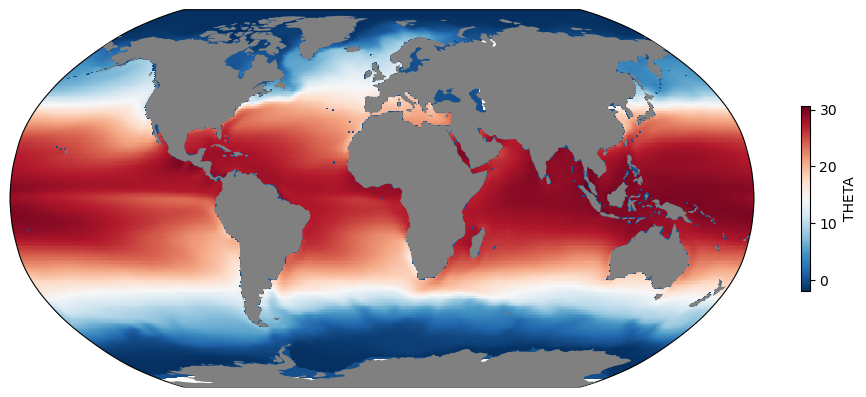

In [15]:
mapper(mean_sst, cmap='RdBu_r');

In [16]:
%time ds.THETA.isel(k=0).mean(dim='time').load()

CPU times: user 103 ms, sys: 5.22 ms, total: 108 ms
Wall time: 20.8 s


<xarray.DataArray 'THETA' (face: 13, j: 90, i: 90)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.22906627,  0.20126666,  0.18094039, ...,  0.04199786,
          0.06655131,  0.09593879],
        [ 0.43254805,  0.42036152,  0.4126501 , ...,  0.20539196,
          0.24391538,  0.29138586],
        [ 0.6535146 ,  0.65845466,  0.65769684, ...,  0.37179062,
          0.42764866,  0.49818808]],

       [[ 0.87210137,  0.89154845,  0.88329524, ...,  0.52988845,
          0.60233873,  0.6977836 ],
        [ 1.0961676 ,  1.1175991 ,  1.0779033 , ...,  0.68887544,
          0.774091  ,  0.89128804],
        [ 1.3072966 ,  1.3048965 ,  1.2159245 , ...,  0.85709995,
          0.9489381 ,  1.0793763 ],
...
        [27.479395  , 27.666166  , 27.793968  , ...,  1.4822977 ,
          1.3396592 ,  1.190825  ],
        [27.444382  , 27.641308  , 27.776764  , ...,  1.3742981 ,
          1.2040414 ,  1.031747  ],
        [27.411293  , 27.615599  , 27.76121   , ...,  1.314467  ,
          1.1131614 ,  0.91215134]],

       [[ 4.6964245 ,  4.2194605 ,  3.719968  , ...,  0.        ,
          0.        ,  0.        ],
        [ 4.747999  ,  4.2700696 ,  3.7787225 , ...,  0.        ,
          0.        ,  0.        ],
        [ 4.754464  ,  4.278542  ,  3.7964838 , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 1.0251521 ,  0.82211953,  0.58778673, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.85189605,  0.6512579 ,  0.43876594, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.71174276,  0.5037161 ,  0.30439517, ...,  0.        ,
          0.        ,  0.        ]]], dtype=float32)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    k        int64 0

In [17]:
# the monthly climatology
theta_clim = ds.THETA.groupby('time.month').mean(dim='time')
# the anomaly
theta_anom = ds.THETA.groupby('time.month') - theta_clim
rho0 = 1029
cp = 3994
ohc = rho0 * cp * (theta_anom *
                   coords.rA *
                   coords.hFacC).sum(dim=['face', 'j', 'i'])
ohc



/srv/conda/envs/notebook/lib/python3.10/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 24 times more chunks
  return self.array[key]


<xarray.DataArray (time: 288, k: 50)>
dask.array<mul, shape=(288, 50), dtype=float64, chunksize=(1, 50), chunktype=numpy.ndarray>
Coordinates:
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

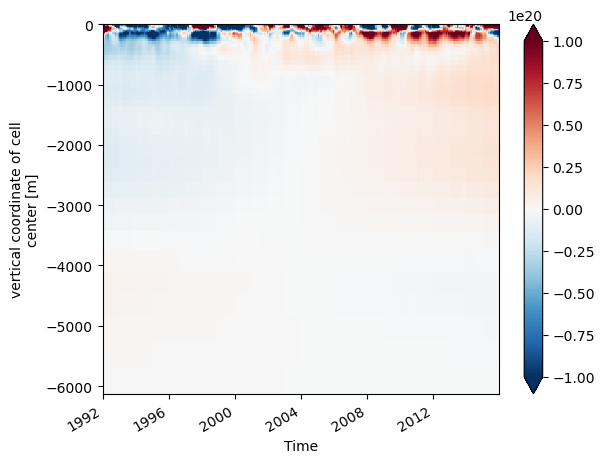

In [18]:
# actually load the data
ohc.load()
# put the depth coordinate back for plotting purposes
ohc.coords['Z'] = coords.Z
ohc.swap_dims({'k': 'Z'}).transpose().plot(vmax=1e20)

In [19]:
import xgcm

# define the connectivity between faces
face_connections = {'face':
                    {0: {'X':  ((12, 'Y', False), (3, 'X', False)),
                         'Y':  (None,             (1, 'Y', False))},
                     1: {'X':  ((11, 'Y', False), (4, 'X', False)),
                         'Y':  ((0, 'Y', False),  (2, 'Y', False))},
                     2: {'X':  ((10, 'Y', False), (5, 'X', False)),
                         'Y':  ((1, 'Y', False),  (6, 'X', False))},
                     3: {'X':  ((0, 'X', False),  (9, 'Y', False)),
                         'Y':  (None,             (4, 'Y', False))},
                     4: {'X':  ((1, 'X', False),  (8, 'Y', False)),
                         'Y':  ((3, 'Y', False),  (5, 'Y', False))},
                     5: {'X':  ((2, 'X', False),  (7, 'Y', False)),
                         'Y':  ((4, 'Y', False),  (6, 'Y', False))},
                     6: {'X':  ((2, 'Y', False),  (7, 'X', False)),
                         'Y':  ((5, 'Y', False),  (10, 'X', False))},
                     7: {'X':  ((6, 'X', False),  (8, 'X', False)),
                         'Y':  ((5, 'X', False),  (10, 'Y', False))},
                     8: {'X':  ((7, 'X', False),  (9, 'X', False)),
                         'Y':  ((4, 'X', False),  (11, 'Y', False))},
                     9: {'X':  ((8, 'X', False),  None),
                         'Y':  ((3, 'X', False),  (12, 'Y', False))},
                     10: {'X': ((6, 'Y', False),  (11, 'X', False)),
                          'Y': ((7, 'Y', False),  (2, 'X', False))},
                     11: {'X': ((10, 'X', False), (12, 'X', False)),
                          'Y': ((8, 'Y', False),  (1, 'X', False))},
                     12: {'X': ((11, 'X', False), None),
                          'Y': ((9, 'Y', False),  (0, 'X', False))}}}

# create the grid object
grid = xgcm.Grid(ds, periodic=False, face_connections=face_connections)
grid

<xgcm.Grid>
T Axis (not periodic, boundary=None):
  * center   time --> inner
  * inner    time_snp --> center
Z Axis (not periodic, boundary=None):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center

In [20]:
ds

<xarray.Dataset>
Dimensions:    (time: 288, k_l: 50, face: 13, j: 90, i: 90, k: 50, i_g: 90,
                j_g: 90, time_snp: 287, k_p1: 51, k_u: 50)
Coordinates:
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * time_snp   (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-01
Data variables: (12/36)
    ADVr_SLT   (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH    (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT   (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH    (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT   (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ...         ...
    basins     (face, j, i) int16 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    oceFWflx   (time, face, j, i) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceQsw     (time, face, j, i) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceSPtnd   (time, k, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    oceTAUX    (time, face, j, i_g) float32 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    oceTAUY    (time, face, j_g, i) float32 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>

In [21]:
# vertical integral and time mean of horizontal diffusive heat flux
advx_th_vint = ds.ADVx_TH.sum(dim='k').mean(dim='time')
advy_th_vint = ds.ADVy_TH.sum(dim='k').mean(dim='time')


In [22]:
advx_th_vint

<xarray.DataArray 'ADVx_TH' (face: 13, j: 90, i_g: 90)>
dask.array<mean_agg-aggregate, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89

In [23]:
advy_th_vint

<xarray.DataArray 'ADVy_TH' (face: 13, j_g: 90, i: 90)>
dask.array<mean_agg-aggregate, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89

In [24]:
grid

<xgcm.Grid>
T Axis (not periodic, boundary=None):
  * center   time --> inner
  * inner    time_snp --> center
Z Axis (not periodic, boundary=None):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center

In [27]:
advx_th_vint = advx_th_vint.compute()
advy_th_vint = advy_th_vint.compute()


In [95]:
advx_th_vint

<xarray.DataArray 'ADVx_TH' (face: 13, j: 90, i_g: 90)>
array([[[        0.  ,         0.  ,         0.  , ...,         0.  ,
                 0.  ,         0.  ],
        [        0.  ,         0.  ,         0.  , ...,         0.  ,
                 0.  ,         0.  ],
        [        0.  ,         0.  ,         0.  , ...,         0.  ,
                 0.  ,         0.  ],
        ...,
        [  1539982.5 ,   1164641.5 ,   1156920.9 , ...,   1239210.2 ,
           1431969.2 ,   1664851.1 ],
        [  1990298.9 ,   1789356.5 ,   2006907.8 , ...,   1188635.  ,
           1339354.4 ,   1554205.4 ],
        [  2791358.5 ,   2928533.  ,   3273778.8 , ...,   1338829.9 ,
           1405768.6 ,   1547935.4 ]],

       [[  3967465.8 ,   4315985.  ,   4441866.5 , ...,   1762772.5 ,
           1702784.6 ,   1707341.2 ],
        [  4562478.  ,   4781012.  ,   4492952.5 , ...,   2443307.  ,
           2248334.2 ,   2063207.5 ],
        [  3360247.  ,   3836927.  ,   3604921.  , ...,   3226340.5 ,
           3010298.2 ,   2666362.8 ],
...
        [ -3592203.  ,  -6315530.  ,  -9854656.  , ...,  -3363669.  ,
          -3425632.5 ,  -3545432.  ],
        [ -3351155.  ,  -4957678.  ,  -7536776.  , ...,  -2550212.2 ,
          -3185079.8 ,  -3984938.8 ],
        [ -3930557.8 ,  -4623698.5 ,  -5952550.  , ...,  -1184322.6 ,
          -1900849.8 ,  -2614389.2 ]],

       [[  7753738.5 ,   6772821.5 ,   6038240.5 , ...,         0.  ,
                 0.  ,         0.  ],
        [  3750913.2 ,   3601101.8 ,   3650279.2 , ...,         0.  ,
                 0.  ,         0.  ],
        [  1015813.3 ,   1390910.6 ,   1880181.4 , ...,         0.  ,
                 0.  ,         0.  ],
        ...,
        [ -3043185.  ,  -1963681.8 ,   -870775.06, ...,         0.  ,
                 0.  ,         0.  ],
        [ -4112297.2 ,  -3335539.5 ,  -2090319.8 , ...,         0.  ,
                 0.  ,         0.  ],
        [ -2952992.5 ,  -2607657.  ,  -1799641.  , ...,         0.  ,
                 0.  ,         0.  ]]], dtype=float32)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89

In [28]:
# difference in the x and y directions
# diff_ADV_th = grid.diff_2d_vector({'X': advx_th_vint, 'Y': advy_th_vint}, boundary='fill')
diff_ADV_th = grid.diff_2d_vector({'X': advx_th_vint, 'Y': advy_th_vint}, boundary='fill')

In [85]:
diff_ADV_th

{'X': <xarray.DataArray 'ADVy_TH' (face: 13, j: 90, i: 90)>
 array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [-3.75341000e+05, -7.72062500e+03,  1.13193625e+05, ...,
           1.92759000e+05,  2.32881875e+05,  2.59001500e+05],
         [-2.00942375e+05,  2.17551250e+05,  2.22787000e+05, ...,
           1.50719375e+05,  2.14851000e+05,  2.82010375e+05],
         [ 1.37174500e+05,  3.45245750e+05,  2.02650250e+05, ...,
           6.69387500e+04,  1.42166750e+05,  2.52251000e+05]],
 
        [[ 3.48519250e+05,  1.25881500e+05, -1.68562500e+05, ...,
          -5.99878750e+04,  4.55662500e+03,  1.53965125e+05],
         [ 2.18534000e+05, 

In [86]:
diff_ADV_th['X']

<xarray.DataArray 'ADVy_TH' (face: 13, j: 90, i: 90)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-3.75341000e+05, -7.72062500e+03,  1.13193625e+05, ...,
          1.92759000e+05,  2.32881875e+05,  2.59001500e+05],
        [-2.00942375e+05,  2.17551250e+05,  2.22787000e+05, ...,
          1.50719375e+05,  2.14851000e+05,  2.82010375e+05],
        [ 1.37174500e+05,  3.45245750e+05,  2.02650250e+05, ...,
          6.69387500e+04,  1.42166750e+05,  2.52251000e+05]],

       [[ 3.48519250e+05,  1.25881500e+05, -1.68562500e+05, ...,
         -5.99878750e+04,  4.55662500e+03,  1.53965125e+05],
        [ 2.18534000e+05, -2.88059500e+05, -5.83482250e+05, ...,
         -1.94972750e+05, -1.85126750e+05, -1.15770000e+04],
        [ 4.76680000e+05, -2.32006000e+05, -6.05026000e+05, ...,
         -2.16042250e+05, -3.43935500e+05, -1.98368500e+05],
...
         -6.19635000e+04, -1.19799500e+05,  5.02247000e+05],
        [-1.60652300e+06, -2.57909800e+06, -3.27267500e+06, ...,
         -6.34867500e+05, -7.99859000e+05, -1.27358500e+05],
        [-6.93140750e+05, -1.32885150e+06, -1.98180400e+06, ...,
         -7.16527125e+05, -7.13539500e+05, -3.38603250e+05]],

       [[-9.80917000e+05, -7.34581000e+05, -5.15735000e+05, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.49811500e+05,  4.91775000e+04,  1.13499000e+05, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 3.75097312e+05,  4.89270750e+05,  4.61181375e+05, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 1.07950325e+06,  1.09290675e+06,  6.04694250e+05, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 7.76757750e+05,  1.24521975e+06,  1.07775375e+06, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 3.45335500e+05,  8.08016000e+05,  8.33681250e+05, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],
      dtype=float32)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89

In [29]:
# convergence
conv_ADV_th = -diff_ADV_th['X'] - diff_ADV_th['Y']
conv_ADV_th

<xarray.DataArray (face: 13, j: 90, i: 90)>
array([[[     -0.    ,      -0.    ,      -0.    , ...,      -0.    ,
              -0.    ,      -0.    ],
        [     -0.    ,      -0.    ,      -0.    , ...,      -0.    ,
              -0.    ,      -0.    ],
        [     -0.    ,      -0.    ,      -0.    , ...,      -0.    ,
              -0.    ,      -0.    ],
        ...,
        [ -23993.312 ,   -9682.211 ,   14747.844 , ...,   11870.875 ,
           12323.625 ,   12610.625 ],
        [ -30013.375 ,   -6176.2344,   24558.875 , ...,    9130.    ,
           10933.75  ,   13644.25  ],
        [ -22058.688 ,   10397.969 ,   48512.312 , ...,    3580.    ,
            7389.25  ,   14257.375 ]],

       [[  -8721.4375,   20487.906 ,   55052.375 , ...,   -4846.125 ,
             831.375 ,   12090.125 ],
        [   7384.5625,   31335.75  ,   61815.562 , ...,  -17006.75  ,
          -11151.25  ,    3768.5   ],
        [  20361.188 ,   35002.125 ,   55287.5   , ...,  -30580.25  ,
          -26607.25  ,   -8779.625 ],
...
        [  -7056.75  ,  -18231.    ,  -28555.    , ...,   -4543.875 ,
            8604.5   ,   27807.5   ],
        [  -2496.    ,  -13653.    ,  -23777.    , ...,   -3828.625 ,
           -5610.75  ,   -5046.75  ],
        [  -1890.25  ,   -9286.5   ,  -19124.    , ...,    3751.625 ,
           -8254.5   ,  -17437.5   ]],

       [[  41933.    ,   51461.    ,   60913.    , ...,      -0.    ,
              -0.    ,      -0.    ],
        [  27343.5   ,   38374.5   ,   48399.    , ...,      -0.    ,
              -0.    ,      -0.    ],
        [  14790.6875,   25097.25  ,   35298.625 , ...,      -0.    ,
              -0.    ,      -0.    ],
        ...,
        [  55642.75  ,   86825.75  ,   93702.25  , ...,      -0.    ,
              -0.    ,      -0.    ],
        [   3200.75  ,   24790.5   ,   34657.5   , ...,      -0.    ,
              -0.    ,      -0.    ],
        [ -26715.5   ,  -21380.125 ,  -10471.    , ...,      -0.    ,
              -0.    ,      -0.    ]]], dtype=float32)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89

In [67]:
# # 将 DFxE_TH 插值到网格中心
# interp_dfx = grid.interp(ds.DFxE_TH, 'Y', boundary='fill')

# # 将 DFyE_TH 插值到网格中心
# interp_dfy = grid.interp(ds.DFyE_TH, 'X', boundary='fill')
# print(interp_dfx)
# print(interp_dfy)

In [97]:
%%time
# vertical integral and time mean of horizontal diffusive heat flux
# difx_th_vint = interp_dfx.sum(dim='k').mean(dim='time')
# dify_th_vint = interp_dfy.sum(dim='k').mean(dim='time')

# vertical integral and time mean of horizontal diffusive heat flux
# vertical integral and time mean of horizontal diffusive heat flux
difx_th_vint = ds.DFxE_TH.sum(dim='k').mean(dim='time')
dify_th_vint = ds.DFyE_TH.sum(dim='k').mean(dim='time')
difx_th_vint.compute()
dify_th_vint.compute()



CPU times: user 872 ms, sys: 5.04 ms, total: 877 ms
Wall time: 12.5 s


<xarray.DataArray 'DFyE_TH' (face: 13, j_g: 90, i: 90)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-1.11805727e+05, -1.11950312e+05, -1.19197680e+05, ...,
         -5.70248984e+04, -6.27200820e+04, -6.89506172e+04],
        [-1.02936891e+05, -1.10620359e+05, -1.20424219e+05, ...,
         -5.78740625e+04, -6.44315156e+04, -7.24875938e+04],
        [-9.74976641e+04, -1.07914680e+05, -1.17075734e+05, ...,
         -5.79872266e+04, -6.46687344e+04, -7.39636562e+04]],

       [[-8.78580625e+04, -9.30855625e+04, -9.37988906e+04, ...,
         -5.78967656e+04, -6.34133945e+04, -7.25249688e+04],
        [-7.40881562e+04, -7.47441094e+04, -6.85662969e+04, ...,
         -6.14731172e+04, -6.45805195e+04, -7.16195000e+04],
        [-5.37050195e+04, -4.78783477e+04, -3.64405938e+04, ...,
         -7.08801875e+04, -7.09516953e+04, -7.41122266e+04],
...
          5.60021523e+04,  5.68131953e+04,  6.03424570e+04],
        [-2.79693799e+03, -2.30704517e+03, -4.60089722e+02, ...,
          4.74185781e+04,  5.47906055e+04,  7.06021094e+04],
        [ 1.82835986e+03,  2.14929962e+02, -3.96850000e+03, ...,
          3.39901562e+04,  3.98947891e+04,  5.43998633e+04]],

       [[-4.29918398e+04, -4.12775430e+04, -4.27866289e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-2.14075820e+04, -2.13074043e+04, -2.33875742e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-7.71774561e+03, -8.99083105e+03, -1.07994463e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 6.03795430e+04,  5.42185781e+04,  4.21502812e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 8.46062188e+04,  9.26743906e+04,  8.47792812e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 7.05345391e+04,  8.48976719e+04,  8.22416641e+04, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],
      dtype=float32)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89

In [108]:
# difference in the x and y directions
# diff_DIF_th = grid.diff_2d_vector({'X': difx_th_vint, 'Y': dify_th_vint}, boundary='fill')


In [98]:
# 将 DFxE_TH 插值到网格中心
interp_dfx = grid.interp(difx_th_vint, 'X', boundary='fill')

# 将 DFyE_TH 插值到网格中心
interp_dfy = grid.interp(dify_th_vint, 'Y', boundary='fill')

In [100]:
interp_dfx.compute()

<xarray.DataArray 'DFxE_TH' (face: 13, j: 90, i: 90)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 2.94149258e+04,  2.45629565e+03, -3.04874951e+03, ...,
         -1.99014316e+04, -2.12022969e+04, -2.19065781e+04],
        [ 2.79325137e+04,  1.60154126e+03, -2.42971924e+02, ...,
         -2.65439980e+04, -2.92684668e+04, -3.05413359e+04],
        [ 2.01073848e+04,  6.01857544e+02,  5.51409717e+03, ...,
         -3.32537734e+04, -3.83319609e+04, -4.08473906e+04]],

       [[ 1.47610996e+04,  2.97936279e+03,  1.40152139e+04, ...,
         -3.86915977e+04, -4.68471641e+04, -5.13826250e+04],
        [ 1.34027871e+04,  1.01431836e+04,  2.56534062e+04, ...,
         -4.17060117e+04, -5.27719141e+04, -5.99745391e+04],
        [ 1.76924863e+04,  1.93769570e+04,  3.48520859e+04, ...,
         -4.23649375e+04, -5.49018203e+04, -6.48501328e+04],
...
          2.16711133e+04,  3.58934766e+04,  5.27104297e+04],
        [ 1.76235016e+05,  1.61391500e+05,  1.51846406e+05, ...,
          2.93118008e+04,  4.56748594e+04,  5.97797500e+04],
        [ 1.61487328e+05,  1.51304656e+05,  1.45497469e+05, ...,
          3.73788828e+04,  5.77711211e+04,  7.20382188e+04]],

       [[ 1.27832047e+05,  1.21895625e+05,  1.28780195e+05, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.25511031e+05,  1.15730047e+05,  1.18915484e+05, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.24614859e+05,  1.10869422e+05,  1.09558328e+05, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 7.79439922e+04,  1.16464500e+05,  1.61548500e+05, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 7.68011094e+04,  1.02905281e+05,  1.35540000e+05, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 8.34441719e+04,  9.66056016e+04,  1.14888969e+05, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],
      dtype=float32)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89

In [101]:
interp_dfy.compute()

<xarray.DataArray 'DFyE_TH' (face: 13, j: 90, i: 90)>
array([[[      0.     ,       0.     ,       0.     , ...,
               0.     ,       0.     ,       0.     ],
        [      0.     ,       0.     ,       0.     , ...,
               0.     ,       0.     ,       0.     ],
        [      0.     ,       0.     ,       0.     , ...,
               0.     ,       0.     ,       0.     ],
        ...,
        [-107371.31   , -111285.336  , -119810.95   , ...,
          -57449.48   ,  -63575.797  ,  -70719.11   ],
        [-100217.28   , -109267.516  , -118749.98   , ...,
          -57930.645  ,  -64550.125  ,  -73225.625  ],
        [ -92677.86   , -100500.125  , -105437.31   , ...,
          -57941.996  ,  -64041.062  ,  -73244.31   ]],

       [[ -80973.11   ,  -83914.836  ,  -81182.59   , ...,
          -59684.94   ,  -63996.957  ,  -72072.234  ],
        [ -63896.586  ,  -61311.227  ,  -52503.445  , ...,
          -66176.66   ,  -67766.11   ,  -72865.86   ],
        [ -39648.09   ,  -31961.902  ,  -19892.61   , ...,
          -80439.92   ,  -78772.77   ,  -78734.734  ],
...
        [  -5450.5693 ,   -2530.5989 ,    2224.0205 , ...,
           51710.367  ,   55801.9    ,   65472.28   ],
        [   -484.28906,   -1046.0576 ,   -2214.295  , ...,
           40704.367  ,   47342.695  ,   62500.984  ],
        [ -73979.16   ,  -72325.234  ,  -72028.59   , ...,
           -9857.432  ,  -17096.684  ,  -16729.1    ]],

       [[ -32199.71   ,  -31292.473  ,  -33087.1    , ...,
               0.     ,       0.     ,       0.     ],
        [ -14562.664  ,  -15149.117  ,  -17093.51   , ...,
               0.     ,       0.     ,       0.     ],
        [  -3984.0166 ,   -5861.757  ,   -7678.285  , ...,
               0.     ,       0.     ,       0.     ],
        ...,
        [  72492.88   ,   73446.484  ,   63464.78   , ...,
               0.     ,       0.     ,       0.     ],
        [  77570.375  ,   88786.03   ,   83510.47   , ...,
               0.     ,       0.     ,       0.     ],
        [ -13481.5625 ,   -9019.609  ,  -14782.031  , ...,
               0.     ,       0.     ,       0.     ]]], dtype=float32)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89

In [102]:
# difference in the x and y directions
# diff_DIF_th = grid.diff_2d_vector({'X': interp_dfx, 'Y': interp_dfy}, boundary='fill')
# convergence
conv_DIF_th = -interp_dfx - interp_dfy
conv_DIF_th


<xarray.DataArray (face: 13, j: 90, i: 90)>
dask.array<sub, shape=(13, 90, 90), dtype=float32, chunksize=(1, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89

In [103]:
# convert to Watts / m^2 and load
mean_adv_conv = rho0 * cp * (conv_ADV_th/coords.rA).fillna(0.).load()
mean_dif_conv = rho0 * cp * (conv_DIF_th/coords.rA).fillna(0.).load()

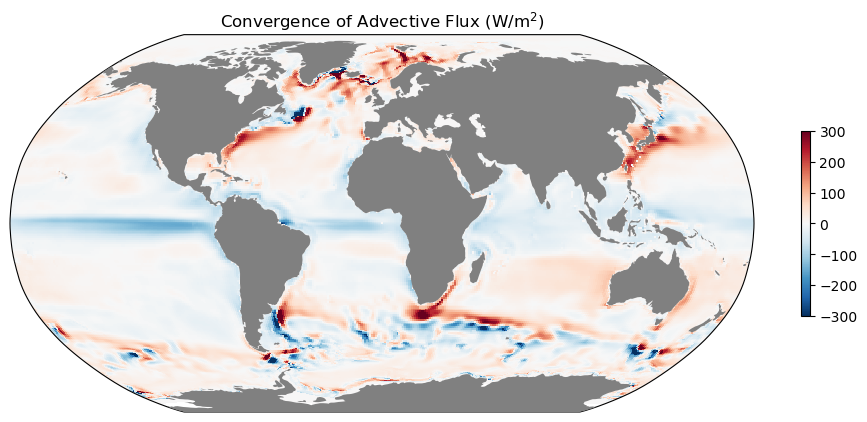

In [64]:
ax = mapper(mean_adv_conv, cmap='RdBu_r', vmax=300, vmin=-300);
ax.set_title(r'Convergence of Advective Flux (W/m$^2$)');

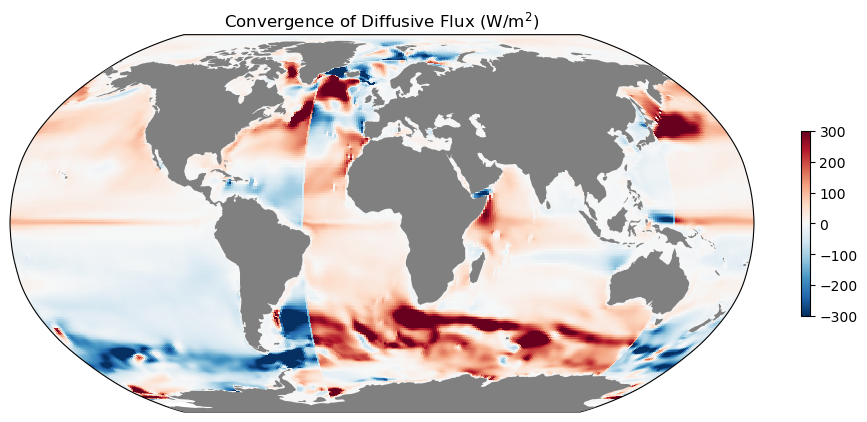

In [104]:
ax = mapper(mean_dif_conv, cmap='RdBu_r', vmax=300, vmin=-300)
ax.set_title(r'Convergence of Diffusive Flux (W/m$^2$)');

In [ ]:
ax = mapper(mean_dif_conv + mean_adv_conv, cmap='RdBu_r', vmax=300, vmin=-300)
ax.set_title(r'Convergence of Net Horizontal Flux (W/m$^2$)');

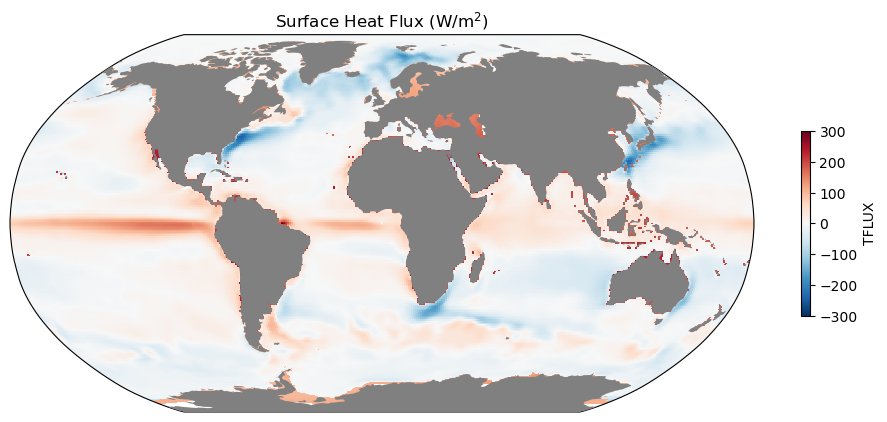

In [66]:
ax = mapper(ds.TFLUX.mean(dim='time').load(), cmap='RdBu_r', vmax=300, vmin=-300);
ax.set_title(r'Surface Heat Flux (W/m$^2$)');
